In [3]:
import matplotlib.pyplot as plt
import math
import numpy as np
import numpy.linalg as lg
from numpy import (linspace, sin, cos, pi)
from numpy.fft import rfft, rfftfreq

In [4]:
len_m = 8000
x = linspace(0, len_m, len_m)  # возвращает равномерно распределённые числа в данном интервале
left_ind = math.floor(len_m * 0.165)
right_ind = math.ceil(len_m * 0.185)

mu, sigma = 0, 1
a0 = 1
a1 = 0.8
a2 = 0.5
w0 = 0.1815
w1_Mas = linspace(0.171, 0.181, 11)
print(w1_Mas)
#w1 = 0.176
w2 = 0.015
k = 0.0000005


[0.171 0.172 0.173 0.174 0.175 0.176 0.177 0.178 0.179 0.18  0.181]


In [5]:
def Generator(w1):
    """   """
    f1 = np.exp(-k*x**2)*((a0 + 0.1*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w0 * x + 2 * pi * 0.00) + (a1 + 0.1*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w1 * x + 2 * pi * 0.00) + (a2 + 0.2*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w2 * x + 2 * pi * 0.00)) + [x for x in 0.25*(np.random.normal(mu, sigma, len_m))]
    f2 = np.exp(-k*x**2)*((a0 + 0.05*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w0 * x + 2 * pi * 0.00425) + (a1 + 0.05*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w1 * x + 2 * pi * 0.00425) + (a2 + 0.1*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w2 * x + 2 * pi * 0.025)) + [x for x in 0.3*(np.random.normal(mu, sigma, len_m))]
    f3 = np.exp(-k*x**2)*((a0 + 0.09*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w0 * x + 2 * pi * 0.0085) + (a1 + 0.09*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w1 * x + 2 * pi * 0.0085) + (a2 + 0.18*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w2 * x + 2 * pi * 0.0085)) + [x for x in 0.2*(np.random.normal(mu, sigma, len_m))]
    f4 = np.exp(-k*x**2)*((a0 + 0.11*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w0 * x + 2 * pi * 0.01275) + (a1 + 0.11*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w1 * x + 2 * pi * 0.01275) + (a2 + 0.22*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w2 * x + 2 * pi * 0.01275)) + [x for x in 0.1*(np.random.normal(mu, sigma, len_m))]

    Mass = np.c_[f1, f2, f3, f4]
    Mass2 = np.delete(Mass, (0), axis=0)
    zeros = np.array([0, 0, 0, 0])
    Mass2 = np.vstack((Mass2, zeros))
    Mass = np.concatenate((Mass, Mass2), axis=1)

    Mass2 = np.delete(Mass, (0, 1), axis=0) 
    zeros_2 = np.zeros((2, 8))
    Mass2 = np.vstack((Mass2, zeros_2))
    Mass = np.concatenate((Mass, Mass2), axis=1)
    
    return(Mass)


In [6]:
def SVD(data):
    """   """
    U, sng, Mass_SVD = lg.svd(data.T, full_matrices=False)
    nu_fft = rfftfreq(len_m, 1.)
    
    return(nu_fft, Mass_SVD)

In [7]:
def FFT(svd, nu, w1):
    """   """
    nu_mas = np.zeros((16,1))
    
    for i in range(svd.shape[0]):
        spectrf = rfft(svd[i, :])
        #nu[np.argmax(np.abs(spectrf), axis=0)]
        
        tmp_nu = nu[left_ind: right_ind]
        print
        tmp_x = spectrf[left_ind: right_ind]

        ind = np.argmax(tmp_x)
        frq_founded = tmp_nu[ind]
        nu_mas[i] = frq_founded
        
        
    delta = nu_mas - w1
    #print(delta)
    real_delta = min(np.abs(delta))
    return(real_delta)

In [22]:
def Plotter(w1_Mas):
    """   """
    points_delta = np.zeros((11,1))
    for i in range(w1_Mas.shape[0]):
        Mas = Generator(w1_Mas[i])
        nu_fft, Mas_SVD = SVD(Mas)
        points_delta[i] = FFT(Mas_SVD, nu_fft, w1_Mas[i])
    
    figsize = [10, 7]
    plt.figure(figsize=figsize)
    plt.plot(np.abs(w1_Mas - w0), np.abs(points_delta), 'o', c='r', linestyle='solid')
    plt.xlabel("Frequency difference ")
    plt.ylabel("Error")
    plt.grid(True)
    #plt.title("Sports Watch Data")
    
    plt.savefig('PCA Diff.png')
    plt.show()     
    

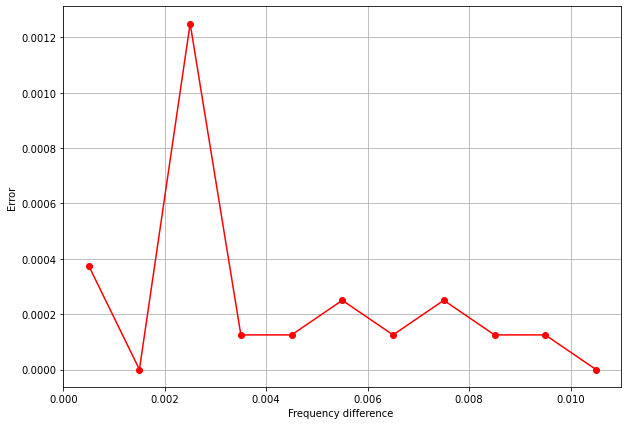

In [23]:
Plotter(w1_Mas)